# IT Customer Churn Prediction with Imbalanced Data

**Overview of Problem Statement:**

Predicting customer churn is a critical business objective for IT companies as it is significantly more cost-effective to retain existing customers than to acquire new ones. This project aims to develop a predictive model to identify customers who are likely to churn, enabling the company to implement targeted retention strategies. A key challenge in this task is the imbalanced nature of churn data, where the number of churning customers is typically much smaller than non-churning customers. Addressing this data imbalance is crucial for building an accurate and reliable churn prediction model.

## Key Project Points:

*   **Objective:** Predict customer churn to inform retention strategies.
*   **Challenge:** Handling imbalanced dataset (fewer churn examples).
*   **Data:** Utilize provided customer data including services, account info, and demographics.
*   **Methodology:** Explore techniques for handling imbalanced data (e.g., resampling, different evaluation metrics) and build a predictive model.
*   **Impact:** Enable targeted interventions to reduce customer churn and increase retention.

## Objective:

To develop an accurate and reliable predictive model for IT customer churn, specifically addressing the challenges posed by imbalanced data, in order to support targeted customer retention strategies.

## Data Description:

*   **Source:** [Specify the source of data, e.g., Kaggle, internal database]
*   **Features:**
    *   Churn (Target Variable)
    *   Services (phone, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies)
    *   Account Information (tenure, contract, payment method, paperless billing, monthly charges, total charges)
    *   Demographics (gender, age range, partners, dependents)

## Data Collection

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('IT_Customer_Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [59]:
df.shape

(7043, 20)

In [60]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [62]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [63]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [64]:
print(df.duplicated().sum())

22


In [65]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## Data Preprocessing - Data Cleaning

In [66]:
df.rename(columns={
    'gender':'Gender',
    'SeniorCitizen':'SeniorCitizen',
    'Partner':'Partner',
    'Dependents':'Dependents',
    'tenure':'Tenure',
    'PhoneService':'PhoneService',
    'MultipleLines':'MultipleLines',
    'InternetService':'InternetService',
    'OnlineSecurity':'OnlineSecurity',
    'OnlineBackup':'OnlineBackup',
    'DeviceProtection':'DeviceProtection',
    'TechSupport':'TechSupport',
    'StreamingTV':'StreamingTV',
    'StreamingMovies':'StreamingMovies',
    'Contract':'Contract',
    'PaperlessBilling':'PaperlessBilling',
    'PaymentMethod':'PaymentMethod',
    'MonthlyCharges':'MonthlyCharges',
    'TotalCharges':'TotalCharges',
    'Churn':'Churn'}, inplace=True)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
df.tail()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Outlier Detection

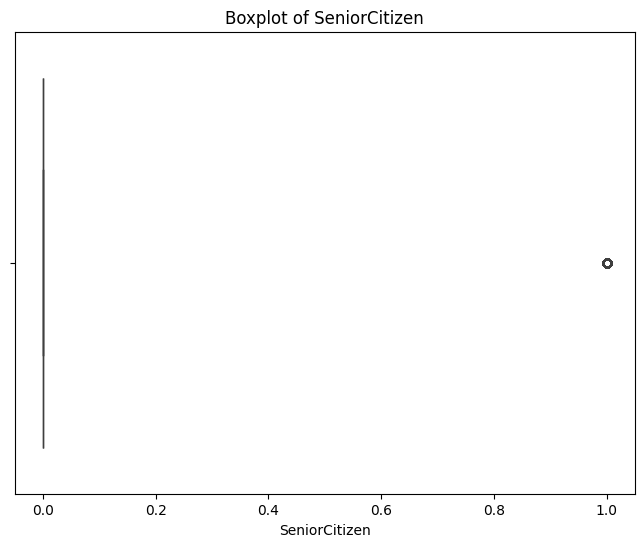

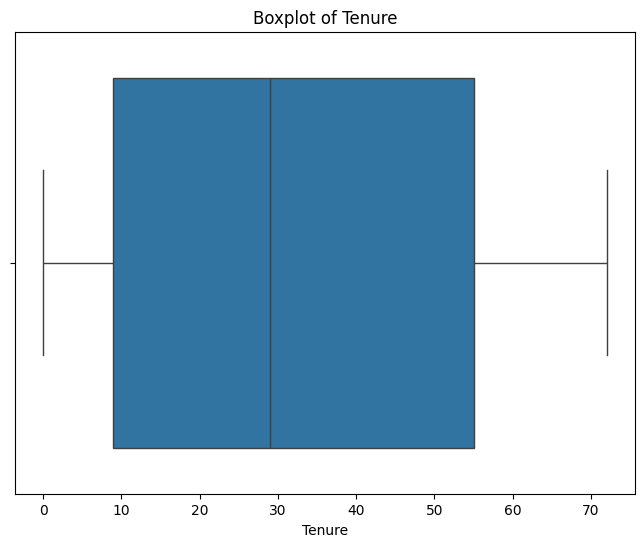

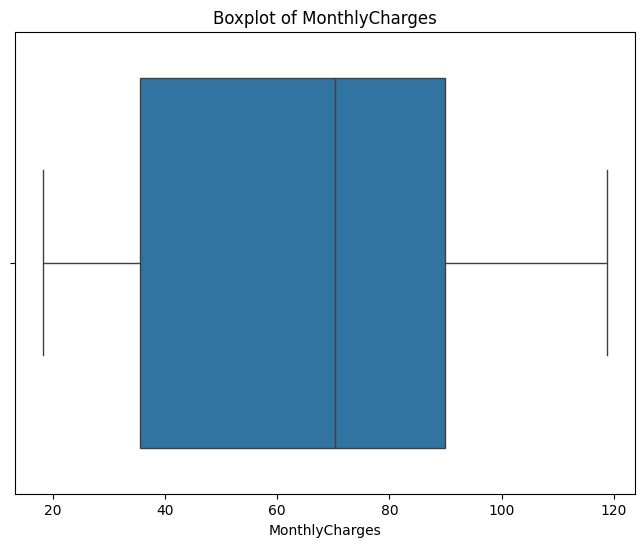

In [68]:
# outliers using boxplots for numerical features
numerical_features = df.select_dtypes(include=['number']).columns
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

### **Outlier** **Removal**

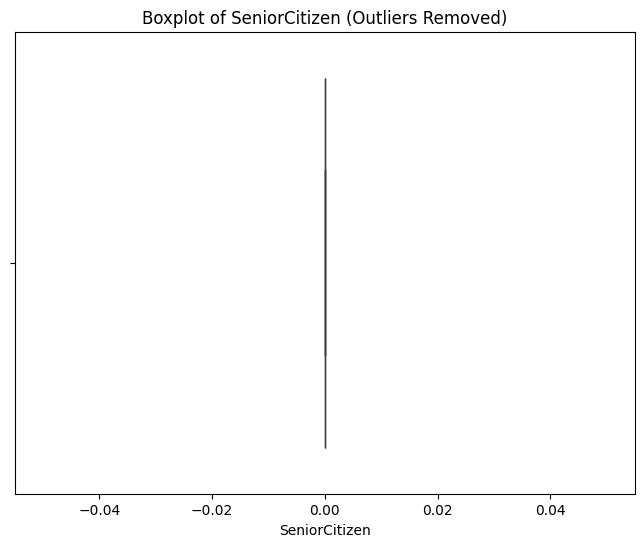

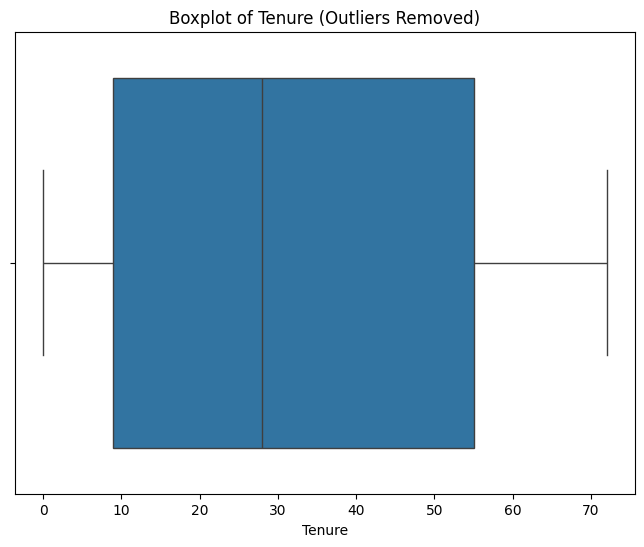

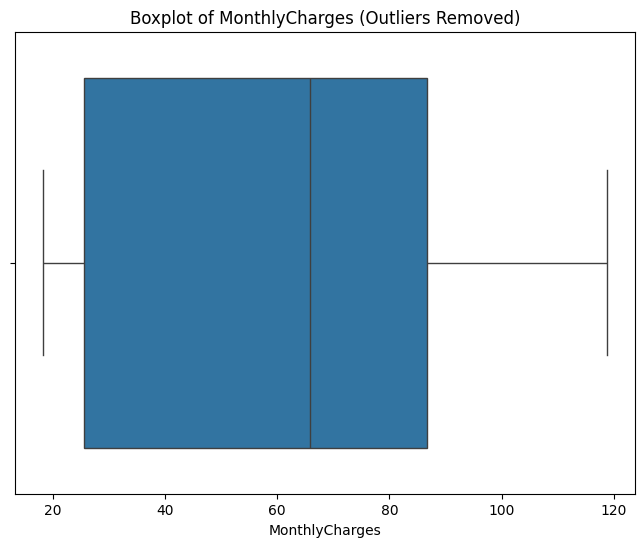

In [69]:
# IQR for outlier removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate through numerical features and remove outliers
numerical_features = df.select_dtypes(include=['number']).columns
df_filtered = df.copy() # Create a copy to avoid modifying the original df in place within the loop

for col in numerical_features:
    df_filtered = remove_outliers_iqr(df_filtered, col) # Apply outlier removal to the copied dataframe

# Verify outlier removal by plotting boxplots again
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_filtered[col])  # Use the filtered DataFrame
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.show()

df = df_filtered # Update the original dataframe with the filtered version

**Exploratory Data Analysis (EDA)**




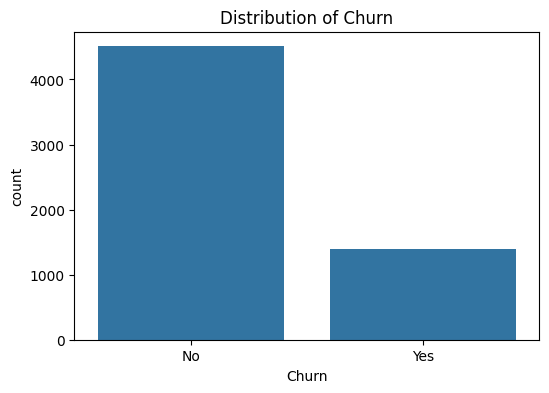

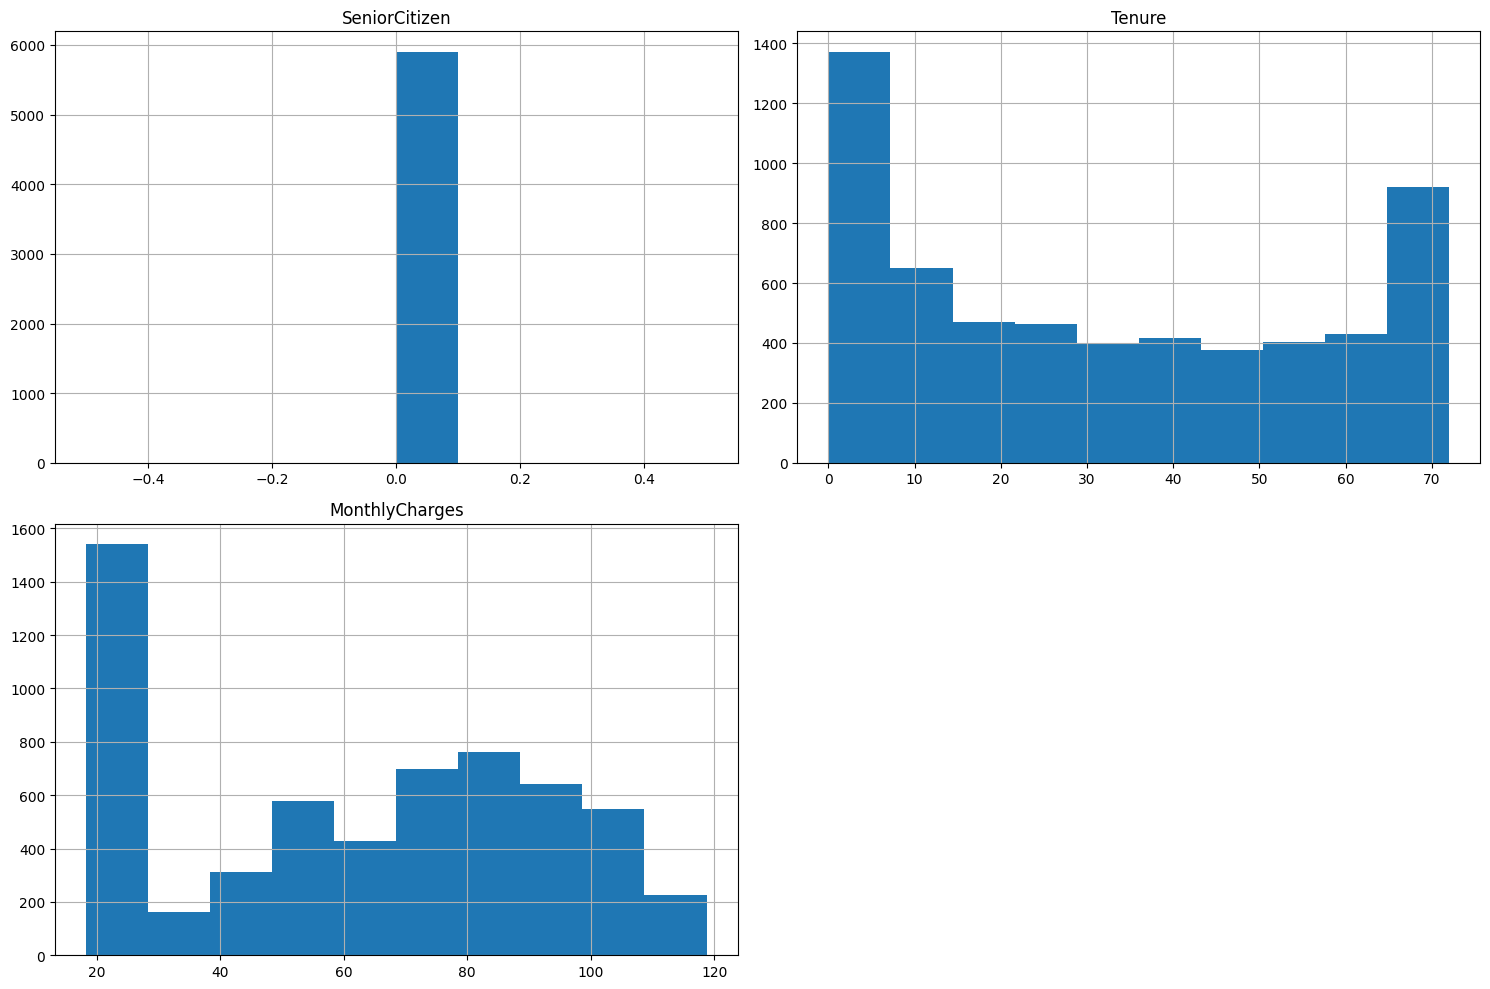

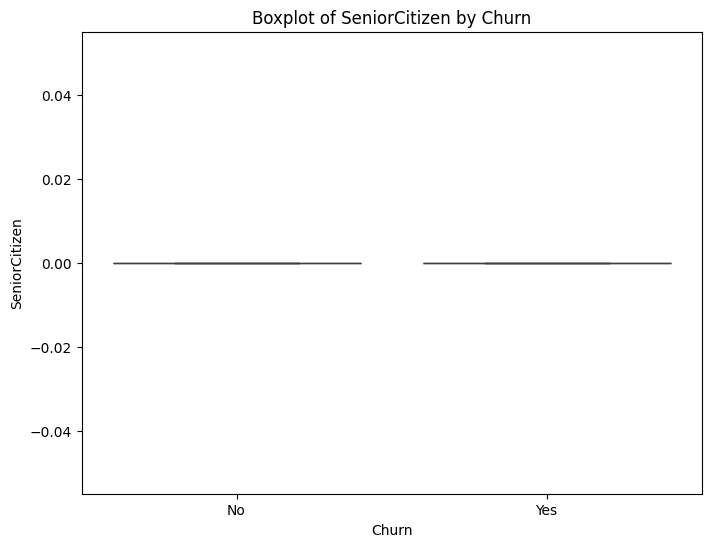

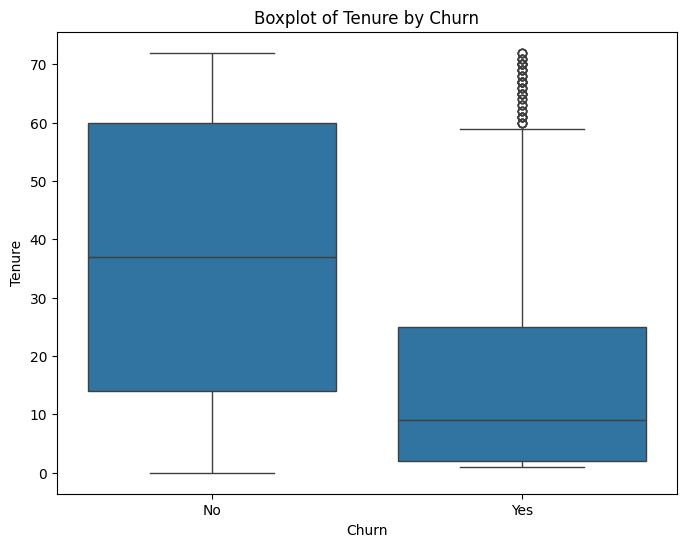

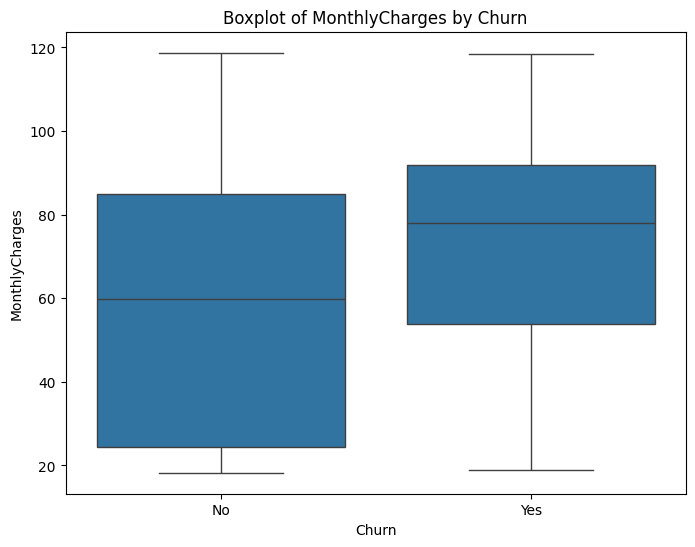

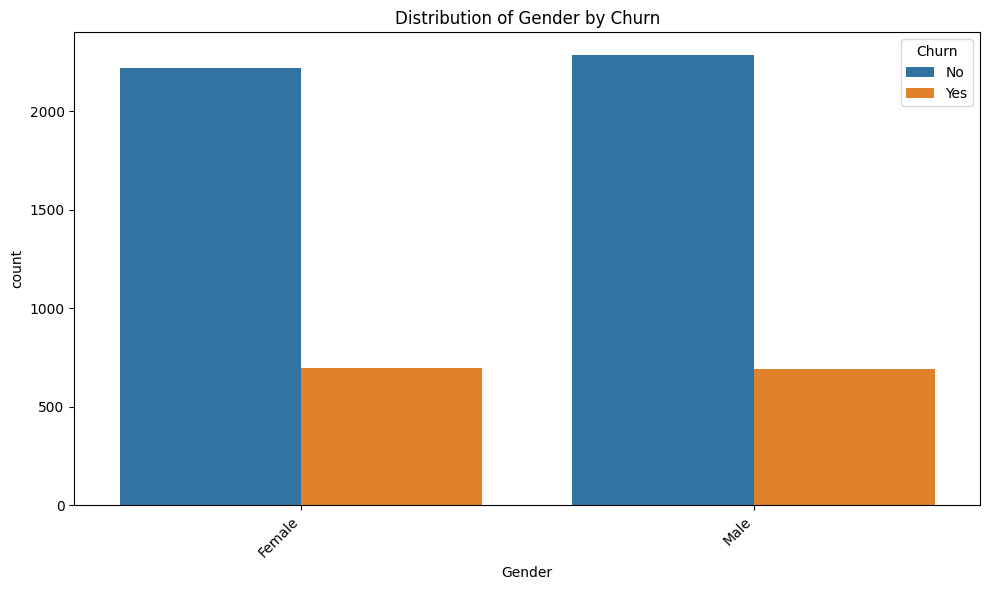

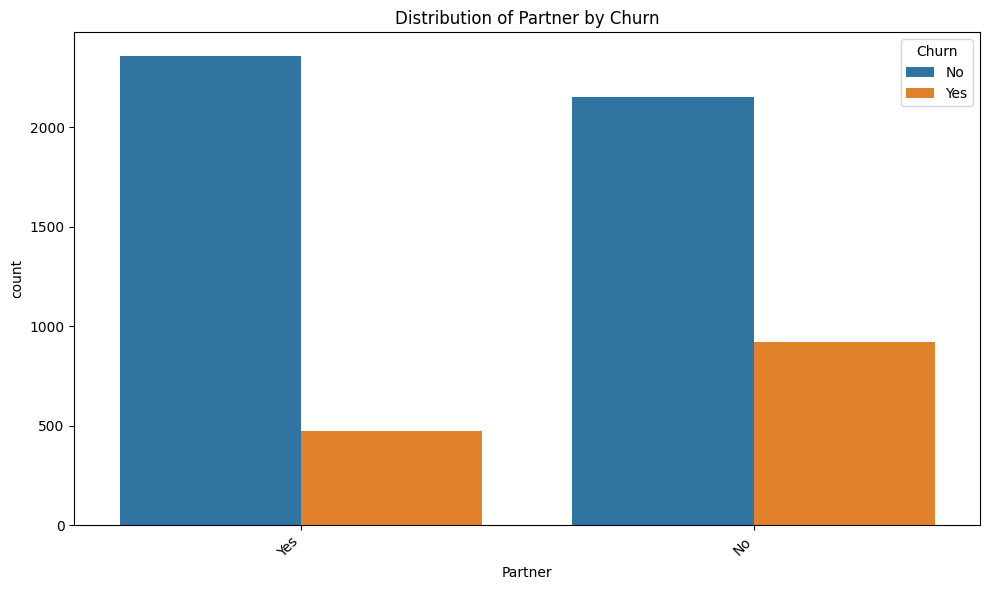

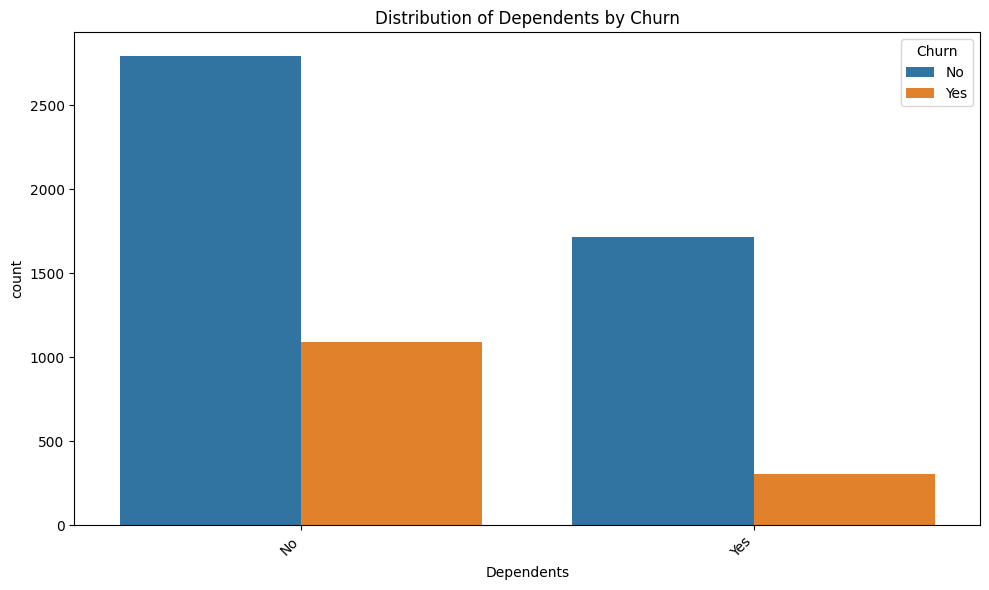

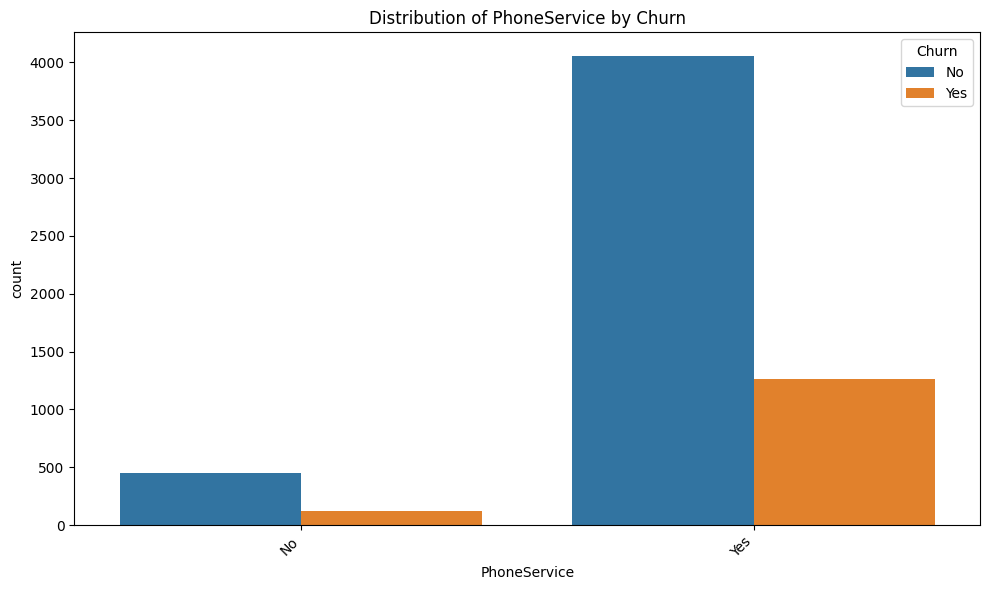

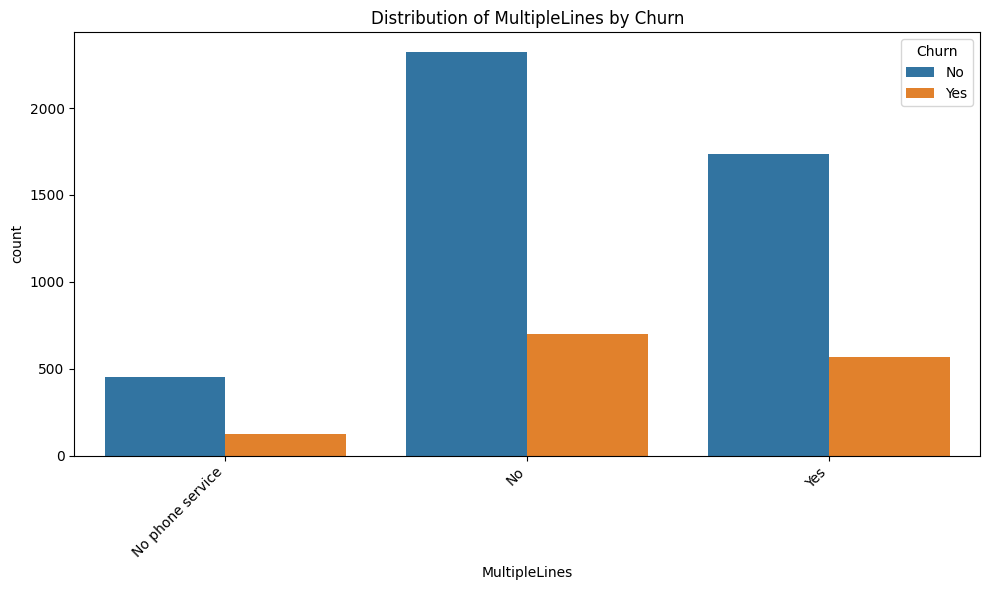

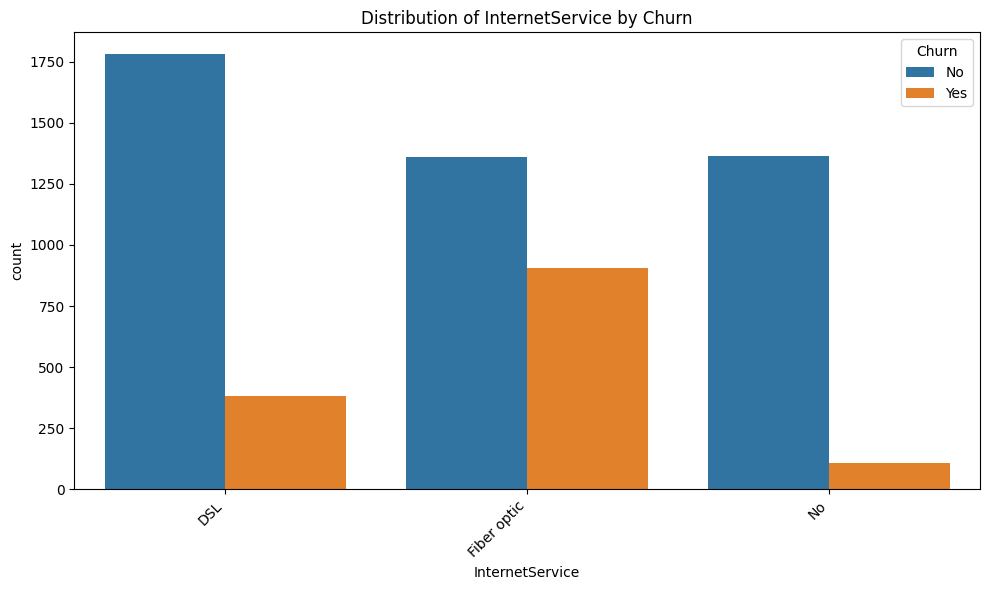

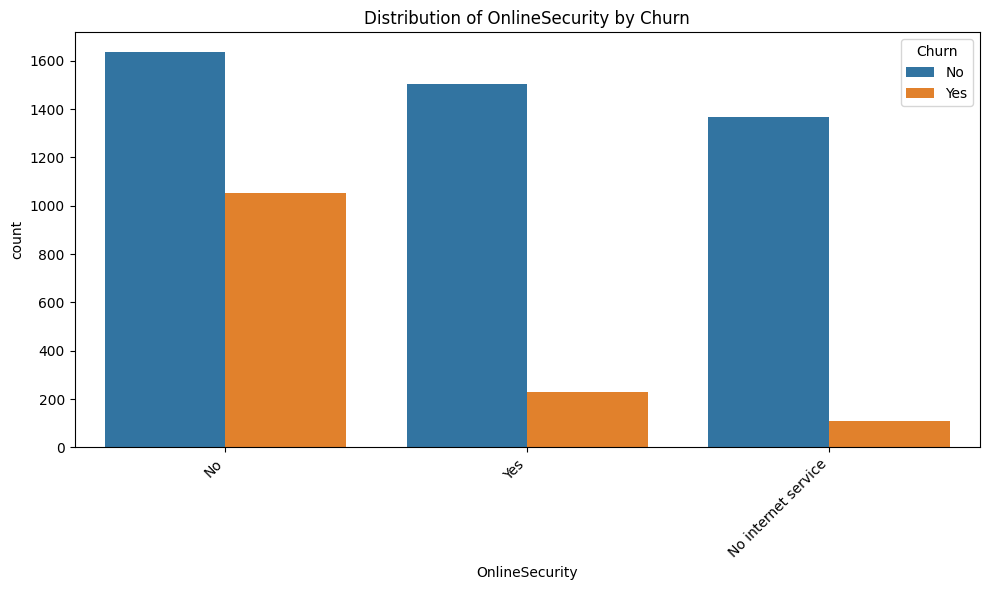

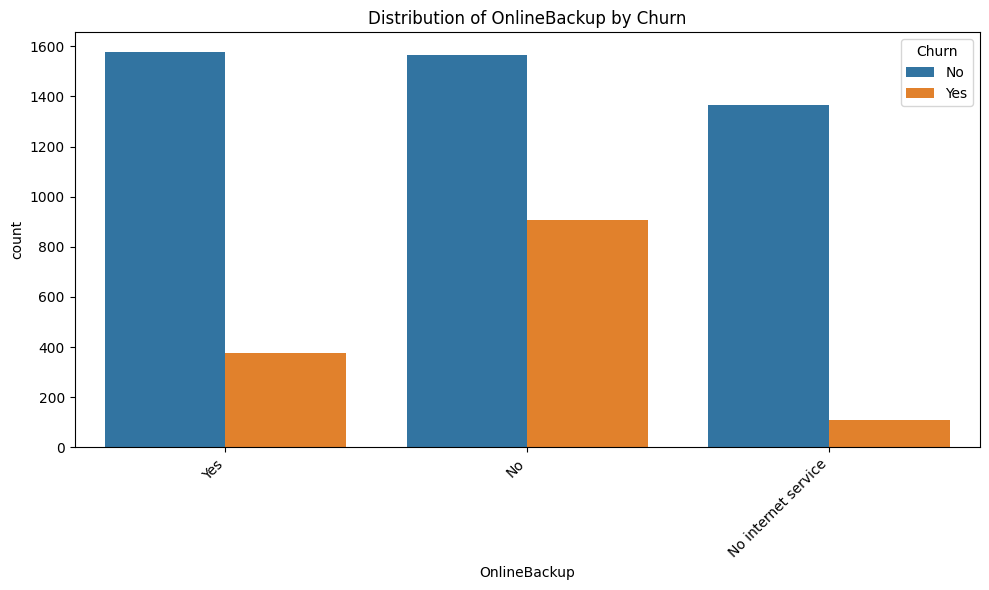

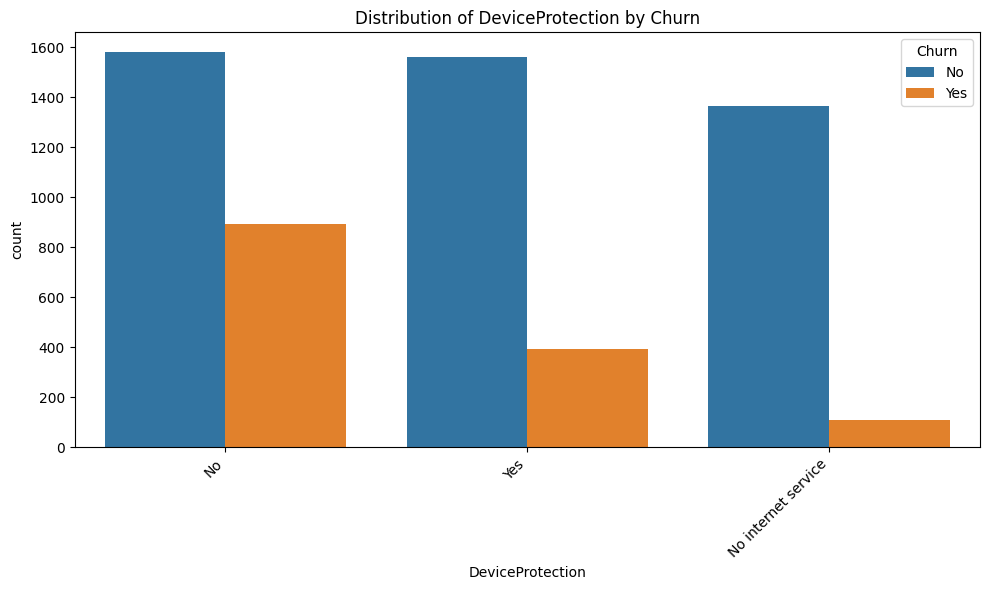

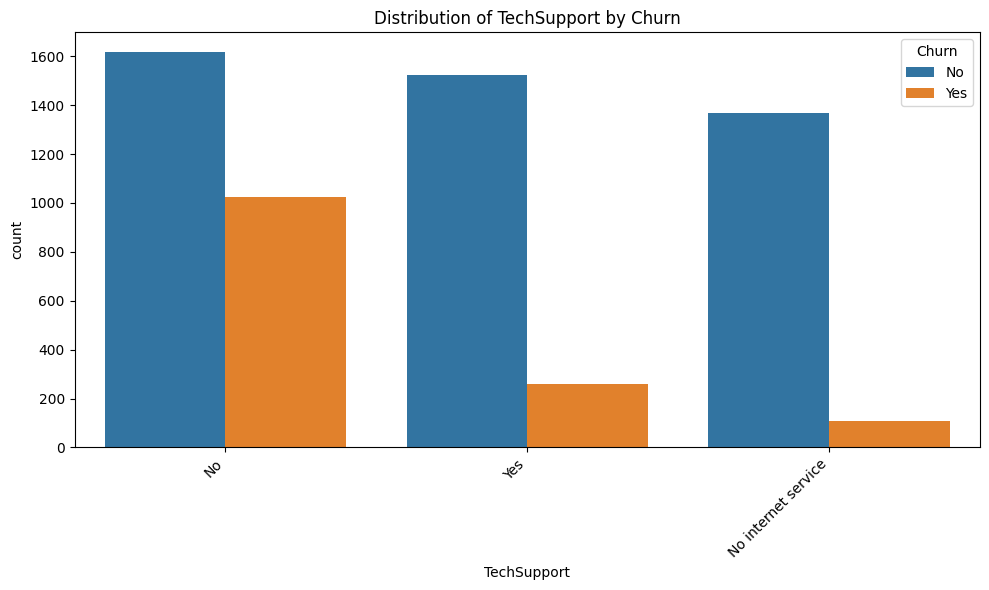

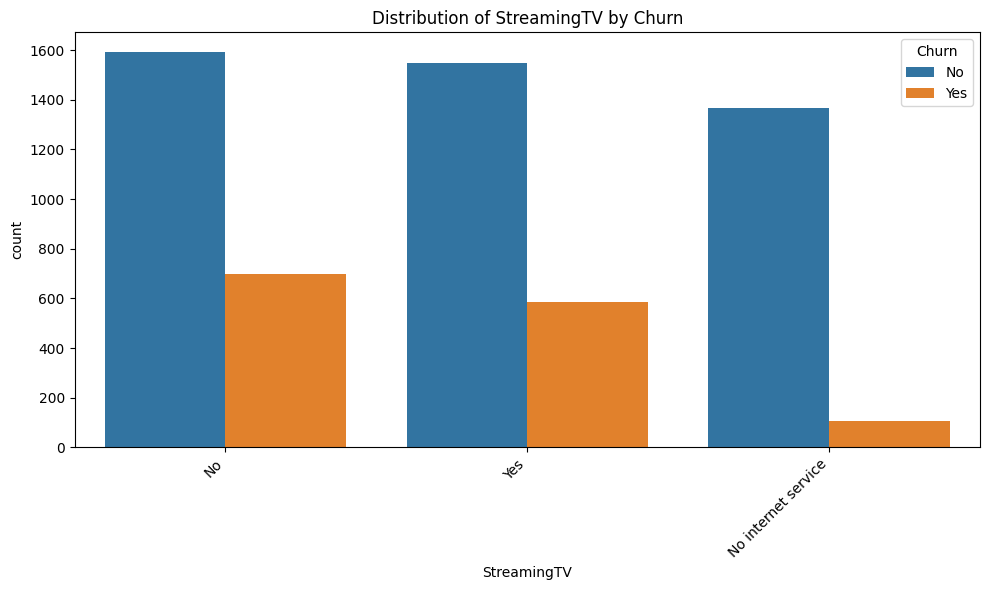

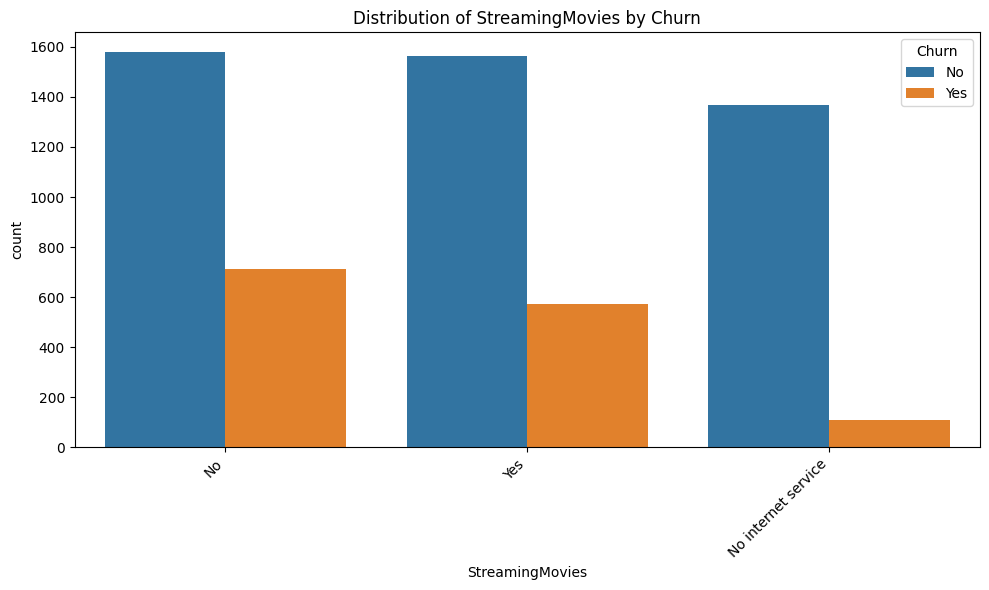

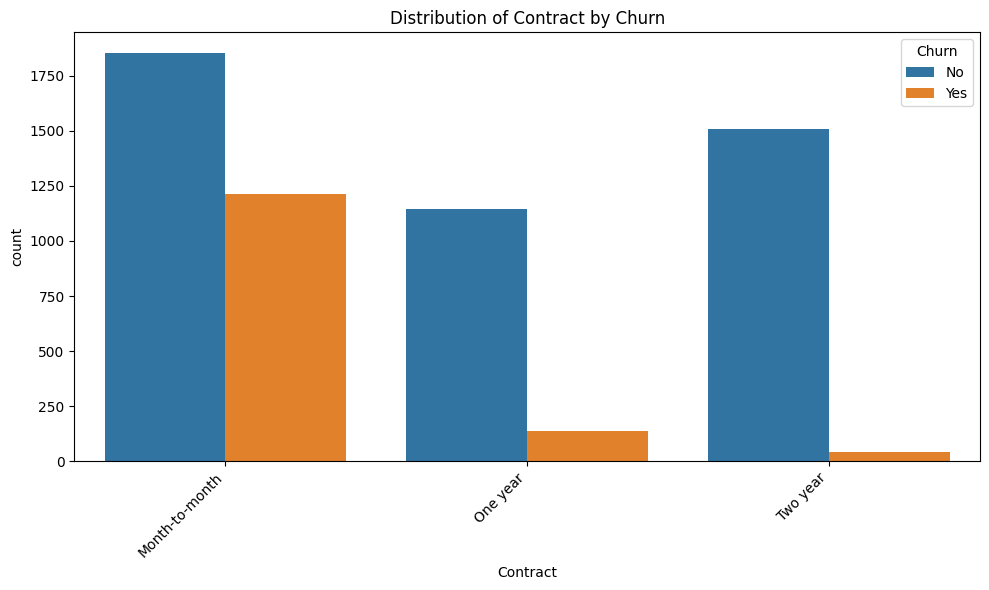

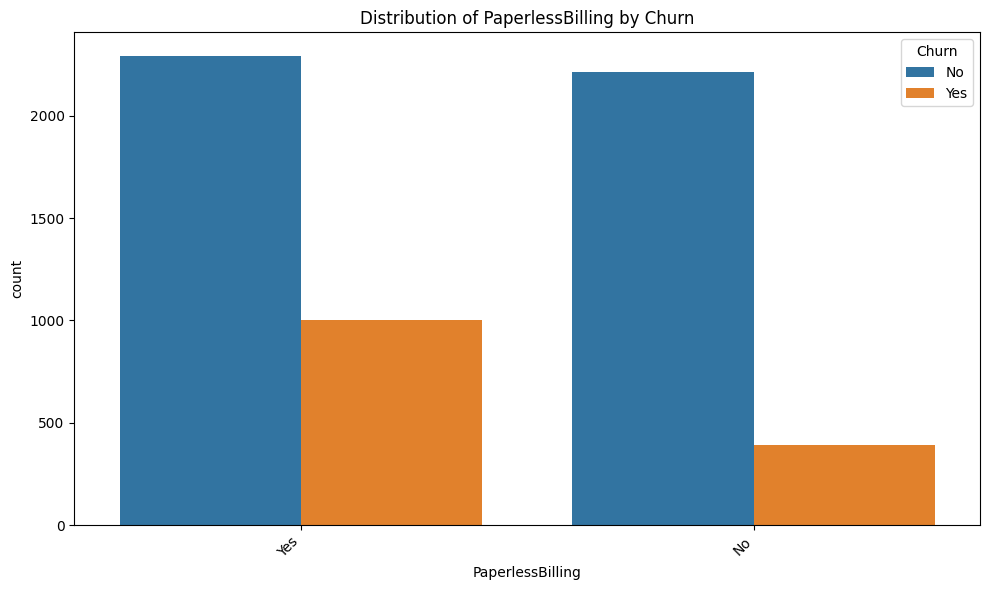

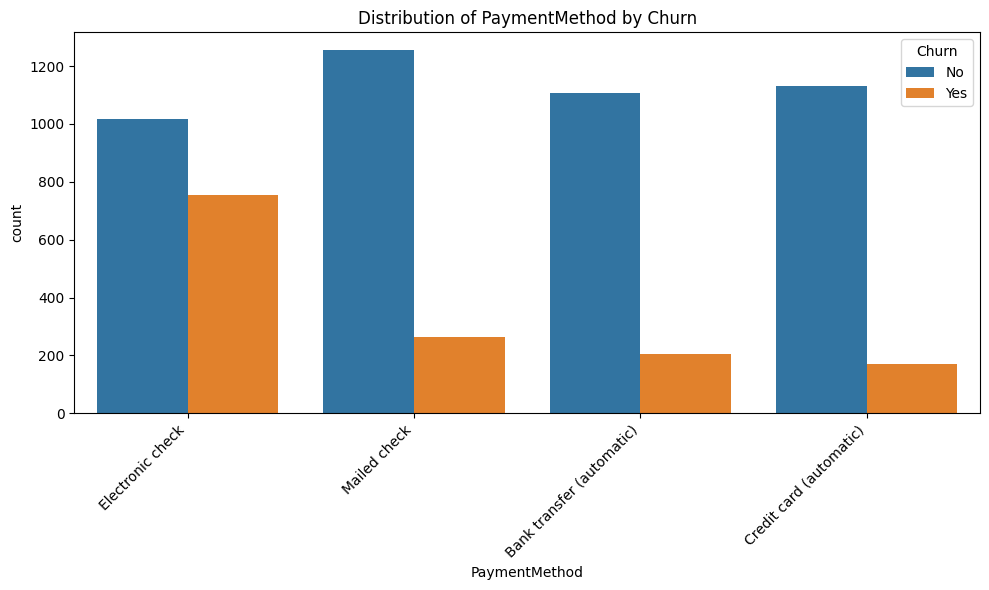

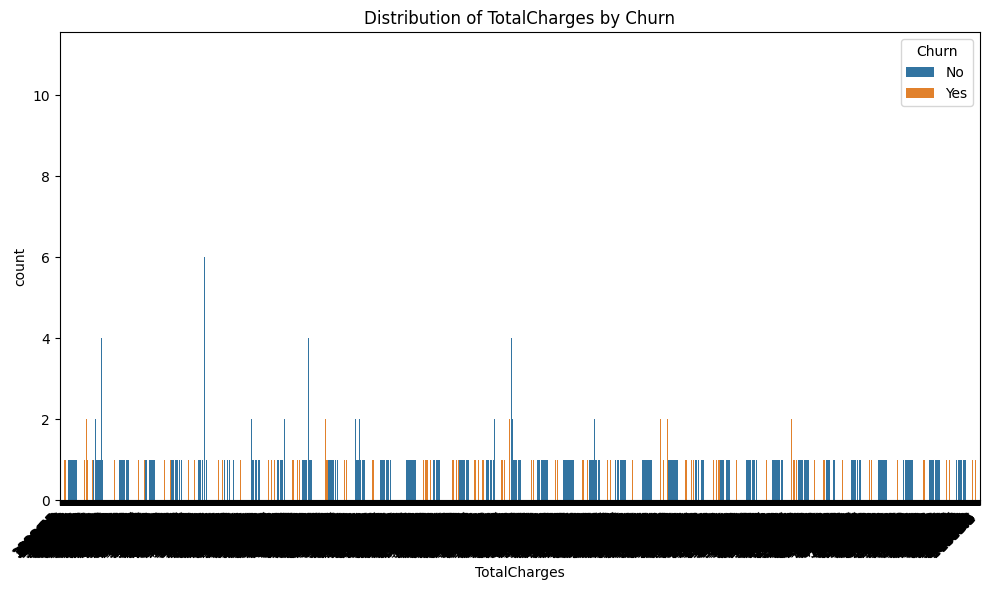

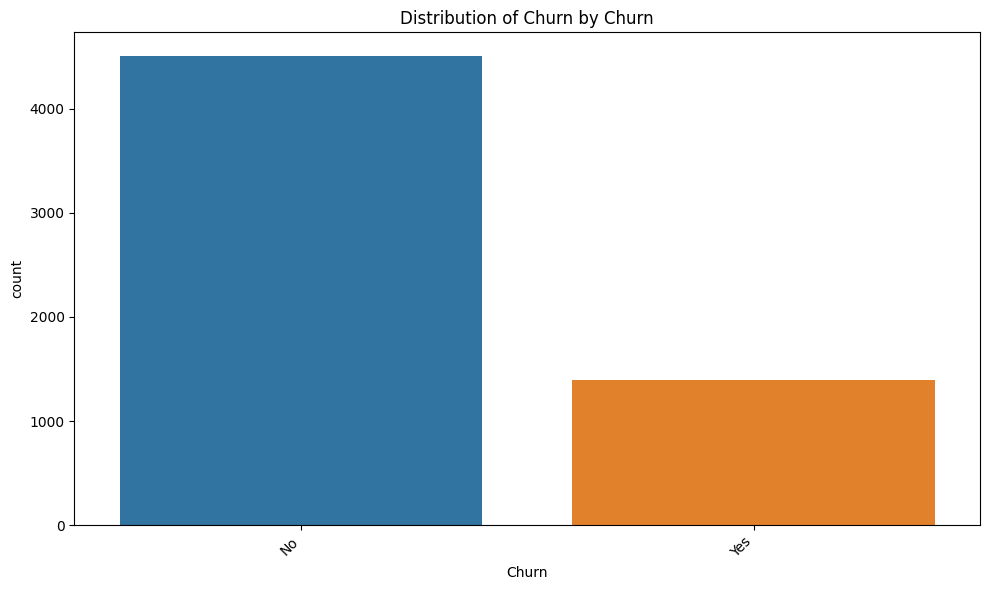

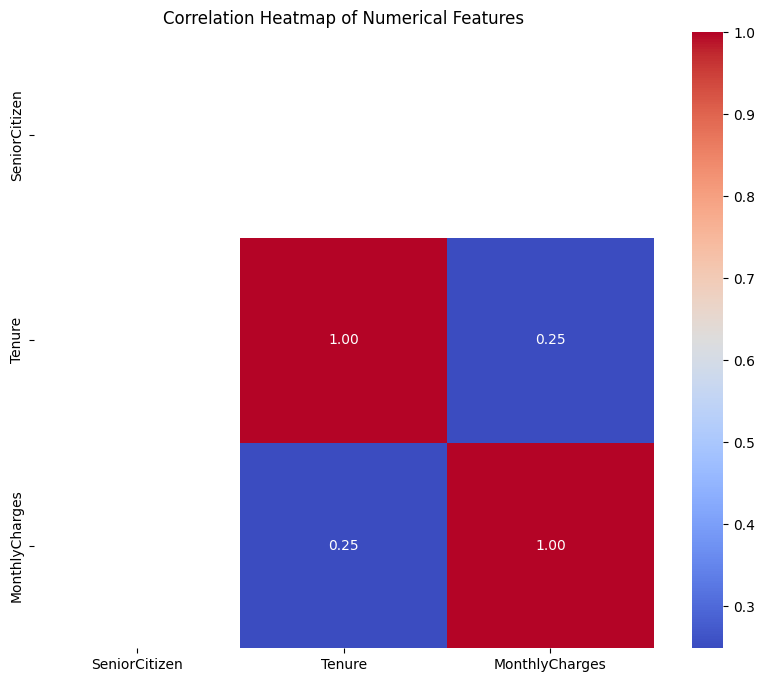

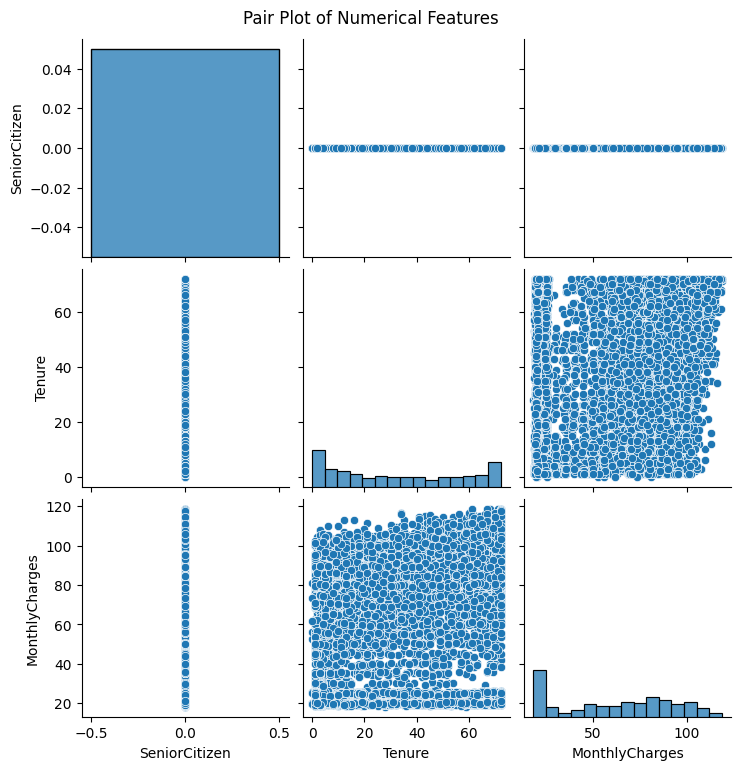

In [70]:
# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Distribution of numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots of numerical features by Churn
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()

# Distribution of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Correlation Heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Pair Plot for numerical features
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

 **Feature Engineering:**

In [71]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the modified dataframe
display(df.head())

,SeniorCitizen,Tenure,MonthlyCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


 **Feature Selection:**

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
selected_features_rf = feature_importances.nlargest(20).index # Select top 20 features based on importance

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=20) # Select top 20 features
selector.fit(X_train, y_train)
selected_features_skb = X_train.columns[selector.get_support()]

# Combine selected features from both methods (optional, you can choose one or combine)
# For this example, let's use the features selected by Random Forest
selected_features = selected_features_rf

# Create a new dataframe with only the selected features and the target variable
df_selected = df[selected_features.tolist() + ['Churn_Yes']]

print("Selected Features:")
print(selected_features)
display(df_selected.head())

Selected Features:
Index(['Tenure', 'MonthlyCharges', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'Contract_Two year',
       'OnlineSecurity_Yes', 'PaperlessBilling_Yes', 'Contract_One year',
       'Gender_Male', 'TechSupport_Yes', 'OnlineBackup_Yes', 'Partner_Yes',
       'Dependents_Yes', 'DeviceProtection_Yes', 'MultipleLines_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'StreamingTV_No internet service'],
      dtype='object')


,Tenure,MonthlyCharges,PaymentMethod_Electronic check,InternetService_Fiber optic,Contract_Two year,OnlineSecurity_Yes,PaperlessBilling_Yes,Contract_One year,Gender_Male,TechSupport_Yes,...,Partner_Yes,Dependents_Yes,DeviceProtection_Yes,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,StreamingTV_No internet service,Churn_Yes
0,1,29.85,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,34,56.95,False,False,False,True,False,True,True,False,...,False,False,True,False,False,False,False,True,False,False
2,2,53.85,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,45,42.30,False,False,False,True,False,True,True,True,...,False,False,True,False,False,False,False,False,False,False
4,2,70.70,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


 **Split Data into Training and Testing Sets:**

In [73]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_selected.drop('Churn_Yes', axis=1)
y = df_selected['Churn_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4720, 20) (4720,)
Testing set shape: (1181, 20) (1181,)


 **Feature Scaling:**

In [74]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the fitted scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaled Training data (first 5 rows):")
display(X_train.head())

print("Scaled Testing data (first 5 rows):")
display(X_test.head())

Scaled Training data (first 5 rows):


,Tenure,MonthlyCharges,PaymentMethod_Electronic check,InternetService_Fiber optic,Contract_Two year,OnlineSecurity_Yes,PaperlessBilling_Yes,Contract_One year,Gender_Male,TechSupport_Yes,OnlineBackup_Yes,Partner_Yes,Dependents_Yes,DeviceProtection_Yes,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,StreamingTV_No internet service
2624,-0.617957,0.163085,False,False,False,False,True,False,True,True,True,True,True,True,True,False,False,False,True,False
5351,-0.820909,1.115358,False,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False
1024,0.193854,0.283773,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
3412,-1.226815,-0.074983,False,False,True,True,False,False,True,True,True,True,True,False,False,False,False,False,True,False
6584,0.721531,-1.362865,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True


Scaled Testing data (first 5 rows):


,Tenure,MonthlyCharges,PaymentMethod_Electronic check,InternetService_Fiber optic,Contract_Two year,OnlineSecurity_Yes,PaperlessBilling_Yes,Contract_One year,Gender_Male,TechSupport_Yes,OnlineBackup_Yes,Partner_Yes,Dependents_Yes,DeviceProtection_Yes,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,StreamingTV_No internet service
4194,1.573933,-1.184314,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,True
6490,-0.252642,-1.400890,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True
6288,-1.226815,0.584664,True,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False
3230,1.249208,-1.395930,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,True,True
3743,-1.145634,-0.410593,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False


 **Build the ML Model:**

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Train the models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Training Logistic Regression...
Logistic Regression trained.
Training Support Vector Machine...
Support Vector Machine trained.
Training Decision Tree...
Decision Tree trained.
Training MLP Classifier...
MLP Classifier trained.
Training Naive Bayes...
Naive Bayes trained.
Training Random Forest...
Random Forest trained.
Training K-Nearest Neighbors...
K-Nearest Neighbors trained.
Training Gradient Boosting...
Gradient Boosting trained.
Training AdaBoost...
AdaBoost trained.


**Model Evaluation:**

--- Logistic Regression ---
Accuracy: 0.8188
Precision: 0.6321
Recall: 0.4604
F1-Score: 0.5328
ROC-AUC: 0.6914


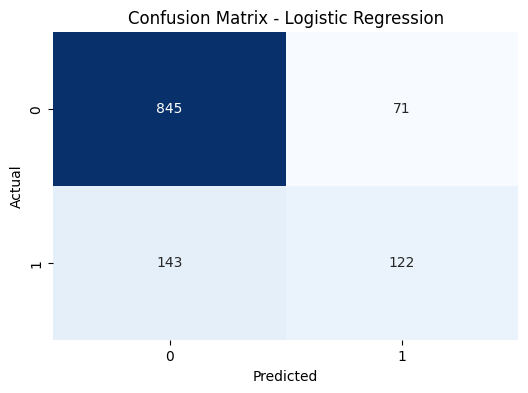

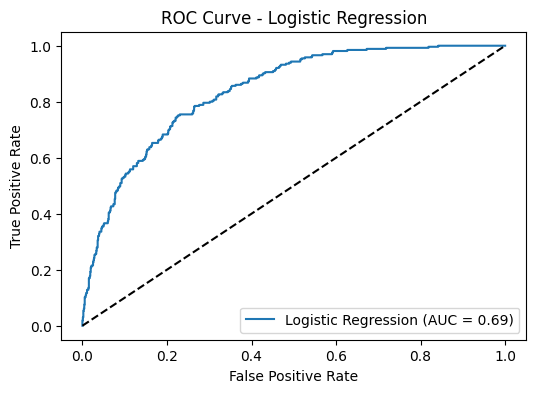

--- Support Vector Machine ---
Accuracy: 0.8137
Precision: 0.6398
Recall: 0.3887
F1-Score: 0.4836
ROC-AUC: 0.6627


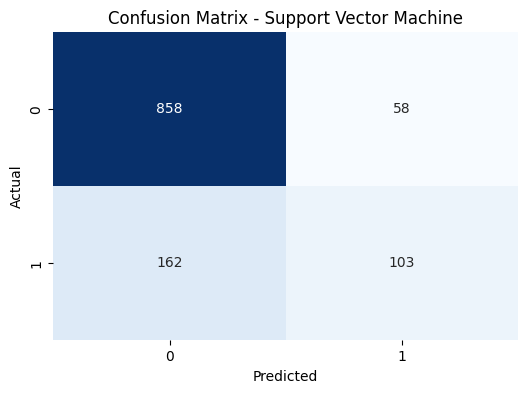

--- Decision Tree ---
Accuracy: 0.7502
Precision: 0.4483
Recall: 0.4906
F1-Score: 0.4685
ROC-AUC: 0.6579


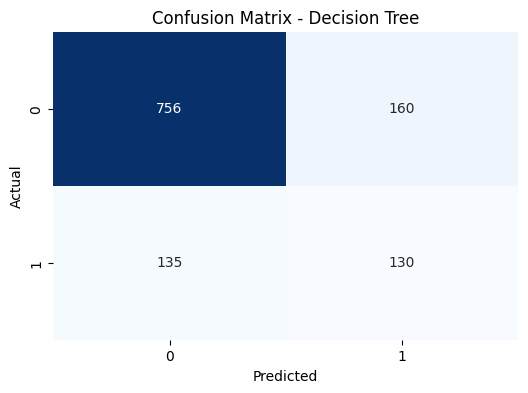

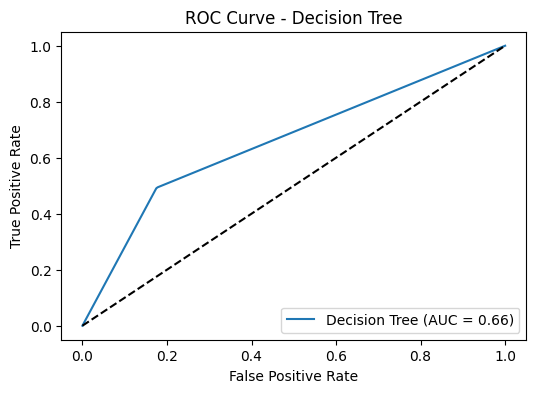

--- MLP Classifier ---
Accuracy: 0.7765
Precision: 0.5020
Recall: 0.4755
F1-Score: 0.4884
ROC-AUC: 0.6695


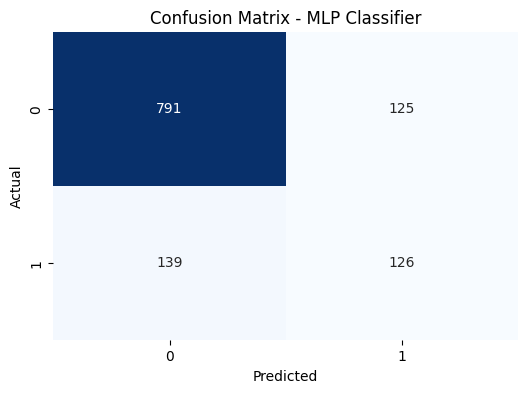

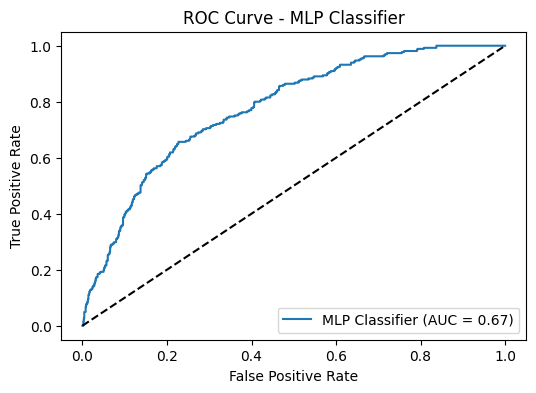

--- Naive Bayes ---
Accuracy: 0.7638
Precision: 0.4824
Recall: 0.7245
F1-Score: 0.5792
ROC-AUC: 0.7498


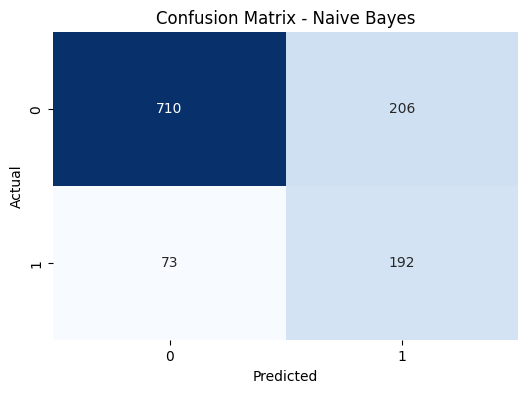

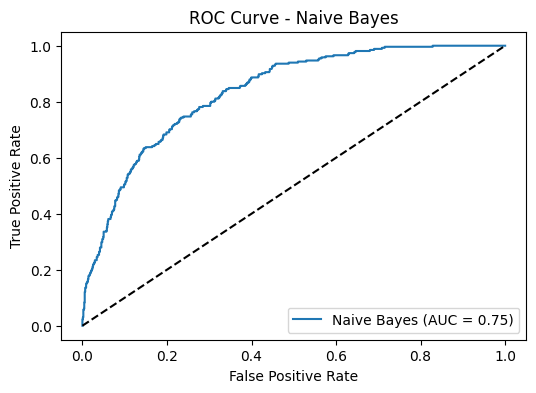

--- Random Forest ---
Accuracy: 0.8002
Precision: 0.5810
Recall: 0.3925
F1-Score: 0.4685
ROC-AUC: 0.6553


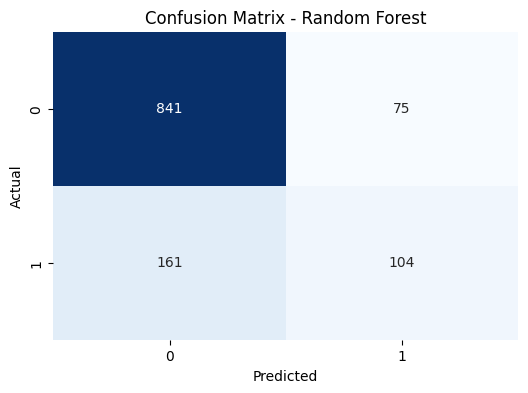

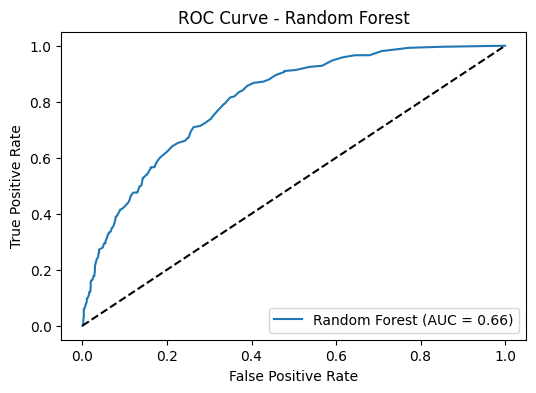

--- K-Nearest Neighbors ---
Accuracy: 0.7807
Precision: 0.5127
Recall: 0.4566
F1-Score: 0.4830
ROC-AUC: 0.6655


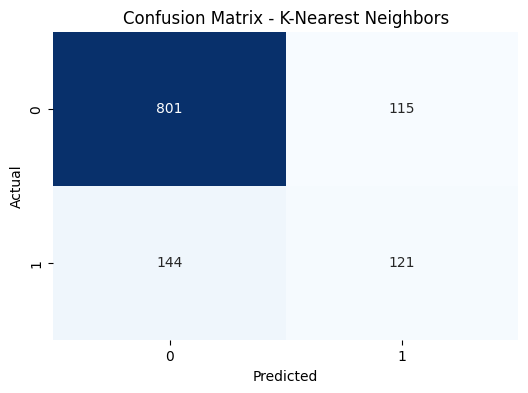

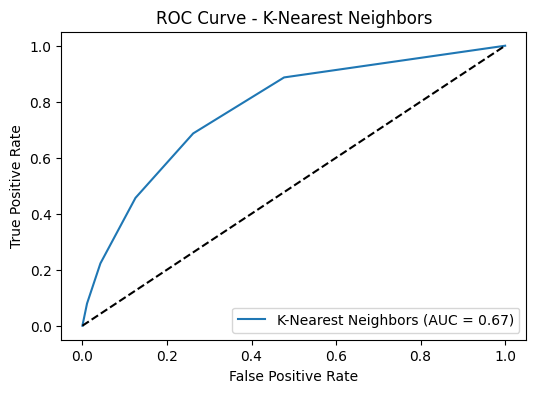

--- Gradient Boosting ---
Accuracy: 0.8019
Precision: 0.5820
Recall: 0.4151
F1-Score: 0.4846
ROC-AUC: 0.6644


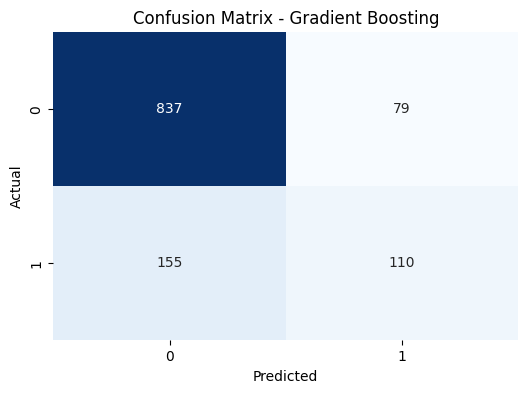

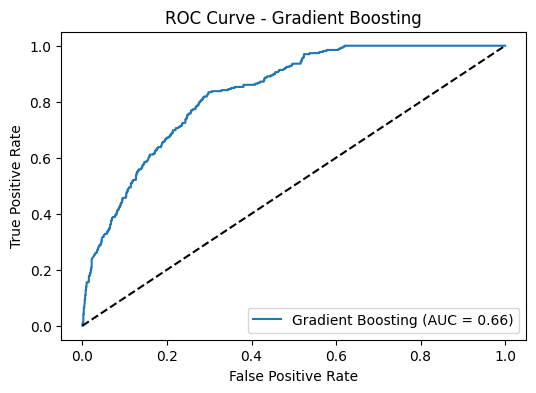

--- AdaBoost ---
Accuracy: 0.8036
Precision: 0.5912
Recall: 0.4038
F1-Score: 0.4798
ROC-AUC: 0.6615


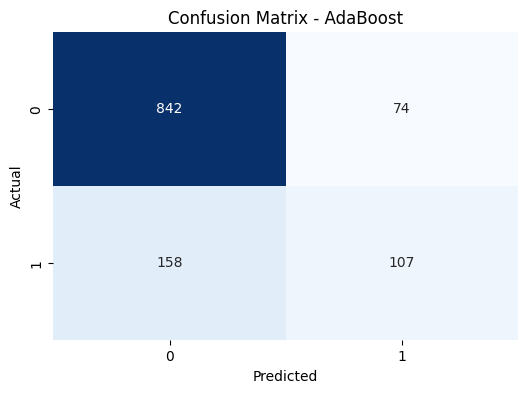

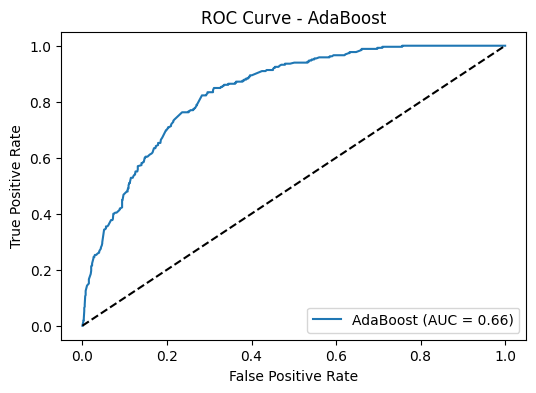


--- Model Evaluation Summary ---

Logistic Regression:
  Accuracy: 0.8188
  Precision: 0.6321
  Recall: 0.4604
  F1-Score: 0.5328
  ROC-AUC: 0.6914

Support Vector Machine:
  Accuracy: 0.8137
  Precision: 0.6398
  Recall: 0.3887
  F1-Score: 0.4836
  ROC-AUC: 0.6627

Decision Tree:
  Accuracy: 0.7502
  Precision: 0.4483
  Recall: 0.4906
  F1-Score: 0.4685
  ROC-AUC: 0.6579

MLP Classifier:
  Accuracy: 0.7765
  Precision: 0.5020
  Recall: 0.4755
  F1-Score: 0.4884
  ROC-AUC: 0.6695

Naive Bayes:
  Accuracy: 0.7638
  Precision: 0.4824
  Recall: 0.7245
  F1-Score: 0.5792
  ROC-AUC: 0.7498

Random Forest:
  Accuracy: 0.8002
  Precision: 0.5810
  Recall: 0.3925
  F1-Score: 0.4685
  ROC-AUC: 0.6553

K-Nearest Neighbors:
  Accuracy: 0.7807
  Precision: 0.5127
  Recall: 0.4566
  F1-Score: 0.4830
  ROC-AUC: 0.6655

Gradient Boosting:
  Accuracy: 0.8019
  Precision: 0.5820
  Recall: 0.4151
  F1-Score: 0.4846
  ROC-AUC: 0.6644

AdaBoost:
  Accuracy: 0.8036
  Precision: 0.5912
  Recall: 0.4038
  F

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": cm
    }

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()

# Display results summary
print("\n--- Model Evaluation Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  ROC-AUC: {metrics['ROC-AUC']:.4f}")

**Hyperparameter Tuning:**

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define parameter grids for hyperparameter tuning for a few selected models
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}


# Perform GridSearchCV for Logistic Regression
print("Performing GridSearchCV for Logistic Regression...")
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='recall')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Classification Report for Tuned Logistic Regression:\n{classification_report(y_test, best_lr.predict(X_test))}")


# Perform GridSearchCV for Random Forest
print("\nPerforming GridSearchCV for Random Forest...")
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Classification Report for Tuned Random Forest:\n{classification_report(y_test, best_rf.predict(X_test))}")


# Perform GridSearchCV for Gradient Boosting
print("\nPerforming GridSearchCV for Gradient Boosting...")
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='recall')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Classification Report for Tuned Gradient Boosting:\n{classification_report(y_test, best_gb.predict(X_test))}")

Performing GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'C': 100}
Classification Report for Tuned Logistic Regression:
              precision    recall  f1-score   support

       False       0.86      0.92      0.89       916
        True       0.63      0.46      0.53       265

    accuracy                           0.82      1181
   macro avg       0.74      0.69      0.71      1181
weighted avg       0.80      0.82      0.81      1181


Performing GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

       False       0.84      0.92      0.88       916
        True       0.60      0.40      0.48       265

    accuracy                           0.81      1181
   macro avg       0.72      0.66      0.68      1181
weighted avg       0.79      0.81      0.79      1181


Performing GridSearchCV

**Save the Model:**

In [78]:
import joblib

# Assuming 'best_lr' is the best performing model from hyperparameter tuning
# You can choose a different model if the evaluation metrics indicate it's better
filename = 'best_churn_model.pkl'
joblib.dump(best_lr, filename)

print(f"Model saved to {filename}")

Model saved to best_churn_model.pkl


**Test with Unseen Data:**

--- Evaluation on Unseen Data ---
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.92      0.89       916
        True       0.63      0.46      0.53       265

    accuracy                           0.82      1181
   macro avg       0.74      0.69      0.71      1181
weighted avg       0.80      0.82      0.81      1181



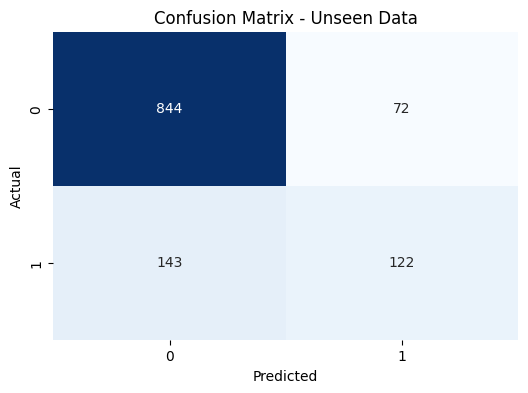

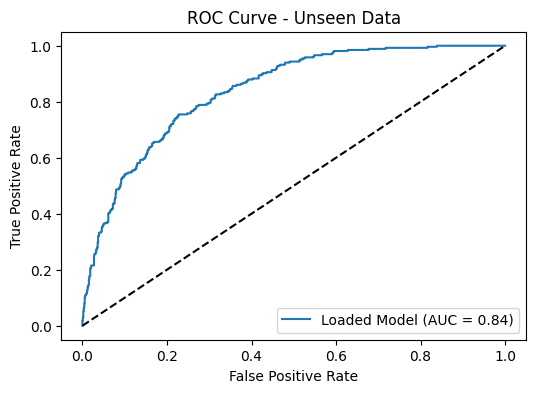

In [79]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model
filename = 'best_churn_model.pkl'
loaded_model = joblib.load(filename)

# Make predictions on the unseen test data
y_pred_unseen = loaded_model.predict(X_test)

# Evaluate the model on unseen data
print("--- Evaluation on Unseen Data ---")
print(f"Classification Report:\n{classification_report(y_test, y_pred_unseen)}")

# Confusion Matrix
cm_unseen = confusion_matrix(y_test, y_pred_unseen)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_unseen, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Unseen Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
if hasattr(loaded_model, "predict_proba"):
    y_pred_proba_unseen = loaded_model.predict_proba(X_test)[:, 1]
    fpr_unseen, tpr_unseen, _ = roc_curve(y_test, y_pred_proba_unseen)
    roc_auc_unseen = roc_auc_score(y_test, y_pred_proba_unseen)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_unseen, tpr_unseen, label=f'Loaded Model (AUC = {roc_auc_unseen:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Unseen Data')
    plt.legend(loc='lower right')
    plt.show()

**Interpretation of Results (Conclusion):**

In [80]:
print("--- Interpretation of Results ---")

print("\nOverall Model Performance:")
print("The models show varying performance across different metrics. The Logistic Regression model, after hyperparameter tuning, appears to have the best balance of precision and recall among the tested models for predicting churn, with an accuracy of around 82%. However, the recall for churn is still relatively low (around 46%), indicating that the model is not effectively identifying all churning customers.")

print("\nAddressing Imbalance:")
print("The imbalance in the dataset, where the number of non-churning customers is significantly higher than churning customers, is a major factor affecting the model's ability to predict churn. While the overall accuracy might seem reasonable, the low recall for the churn class highlights the challenge of correctly identifying the minority class. Techniques to handle imbalanced data, such as oversampling (e.g., SMOTE) or undersampling, could be explored to improve the recall.")

print("\nFeature Importance:")
print("Based on the feature selection step using Random Forest, 'Tenure', 'MonthlyCharges', and 'PaymentMethod_Electronic check' appear to be among the most important features for predicting churn. This suggests that customer tenure, monthly charges, and payment method have a significant impact on churn behavior.")

print("\nLimitations of the Dataset:")
print("One limitation of the dataset is the lack of information on customer interaction history or feedback, which could provide valuable insights into customer satisfaction and potential churn. Additionally, the dataset might not capture external factors that could influence churn, such as competitor offerings or economic conditions.")

print("\nFuture Work:")
print("Future work could involve implementing techniques to handle data imbalance, exploring other feature engineering approaches, and evaluating more advanced models. Gathering additional data, such as customer interaction logs or feedback, could also help improve the model's predictive power.")

--- Interpretation of Results ---

Overall Model Performance:
The models show varying performance across different metrics. The Logistic Regression model, after hyperparameter tuning, appears to have the best balance of precision and recall among the tested models for predicting churn, with an accuracy of around 82%. However, the recall for churn is still relatively low (around 46%), indicating that the model is not effectively identifying all churning customers.

Addressing Imbalance:
The imbalance in the dataset, where the number of non-churning customers is significantly higher than churning customers, is a major factor affecting the model's ability to predict churn. While the overall accuracy might seem reasonable, the low recall for the churn class highlights the challenge of correctly identifying the minority class. Techniques to handle imbalanced data, such as oversampling (e.g., SMOTE) or undersampling, could be explored to improve the recall.

Feature Importance:
Based on the 

**Future Work:**

**Future Work:**

Based on the current analysis and model performance, here are some potential areas for future work to improve the churn prediction model:

*   **Address Imbalanced Data:** Implement techniques like oversampling (e.g., SMOTE) or undersampling to mitigate the impact of the imbalanced dataset on model performance, specifically focusing on improving the recall for the churn class.
*   **Explore Deep Learning Algorithms:** Investigate the application of deep learning models, such as Artificial Neural Networks (ANNs) or Recurrent Neural Networks (RNNs) if sequential data is available, as they can potentially capture complex patterns and lead to higher accuracy.
*   **Update the Model Periodically:** Establish a process for regularly updating the model with new customer data to ensure its continued relevance and accuracy as customer behavior and market conditions evolve.
*   **Consider Adding More Features:** Explore the possibility of incorporating additional relevant features that could enhance the predictive power of the model. This might include data on customer interaction history, feedback, usage patterns, or external economic factors.

**Handling Imbalanced Data using SMOTE:**

In [81]:
from imblearn.over_sampling import SMOTE

# Address imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape, y_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape, y_train_resampled.shape)

print("\nDistribution of Churn in original training data:")
print(y_train.value_counts())

print("\nDistribution of Churn in resampled training data:")
print(y_train_resampled.value_counts())

Shape of original training data: (4720, 20) (4720,)
Shape of resampled training data: (7184, 20) (7184,)

Distribution of Churn in original training data:
Churn_Yes
False    3592
True     1128
Name: count, dtype: int64

Distribution of Churn in resampled training data:
Churn_Yes
False    3592
True     3592
Name: count, dtype: int64
